In [18]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('C:/Users/prebe/.fastai/data/mnist_sample/labels.csv'),Path('C:/Users/prebe/.fastai/data/mnist_sample/train'),Path('C:/Users/prebe/.fastai/data/mnist_sample/valid')]

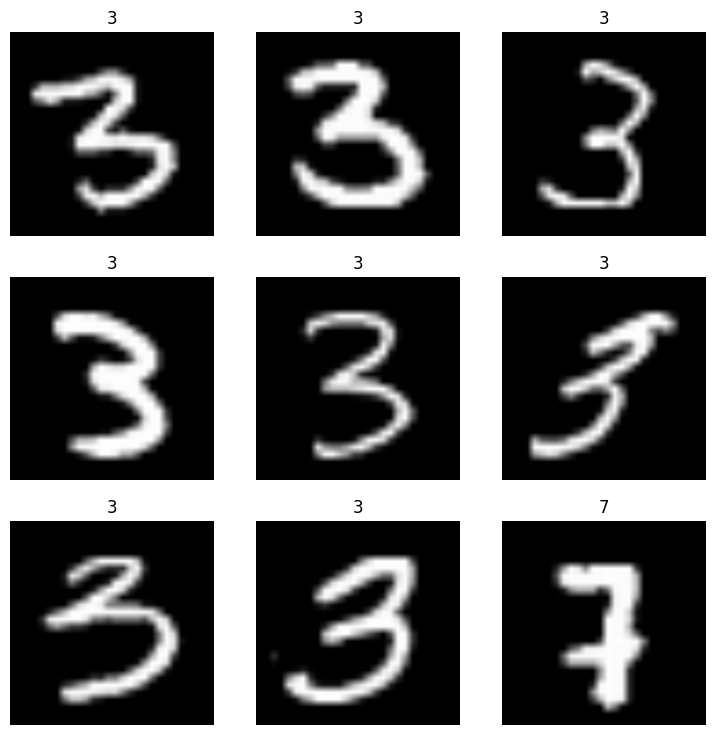

In [19]:
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', 
                                   item_tfms=Resize(224), 
                                   batch_tfms=Normalize.from_stats(*imagenet_stats))
dls.show_batch()

In [20]:
unique_labels = set(dls.vocab)
print("Unique labels in the MNIST_TINY dataset:", unique_labels)


Unique labels in the MNIST_TINY dataset: {'3', '7'}


In [9]:
train_items = len(dls.train_ds)
valid_items = len(dls.valid_ds)

print(f"Number of training items: {train_items}")
print(f"Number of validation items: {valid_items}")

Number of training items: 709
Number of validation items: 699


### Using CNN and Resnet18

In [4]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

c:\Users\prebe\OneDrive\HVL2\DAT255\Course_content\venv\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


### Using fine_tune() instaed of fit() to leverage the pre-trained weights effectively

In [5]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.597537,0.132845,0.948498,01:15


epoch,train_loss,valid_loss,accuracy,time
0,0.059942,0.044736,0.985694,01:40
1,0.037943,0.035847,0.988555,01:42
2,0.028818,0.020649,0.991416,01:49
3,0.022896,0.016394,0.992847,02:05


In [6]:
learn.save("digit_classifier_1")

Path('C:/Users/prebe/.fastai/data/mnist_tiny/models/digit_classifier_1.pth')

### Confusion matrix

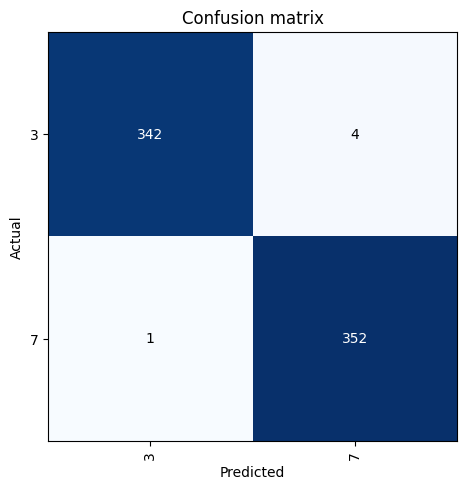

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [11]:
interp.most_confused()

[('3', '7', 4), ('7', '3', 1)]

### Finding a good learning rate

In [ ]:
lr_sugg = learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])
